## 3.1 Interpolation
### I-B Padé Approximations

In [215]:
using LinearAlgebra
# using Plots
using PyCall
using PyPlot
using DataFrames
using CSV
using Symbolics
# plotlyjs()

#### Functions for Gaussian Methods
Although I end up not using them since they converge to a different solution

In [168]:
function Gauss_Method(M::Matrix,N)
    soln=zeros(Rational,size(N))
    soln[end] = (N[end]//M[end,end])

    for i in (size(soln)[1]-1):-1:1
        ∑ax=0//1
        for j in (size(soln)[1]):-1:i+1
            ∑ax+=M[i,j]soln[j]
        end
        soln[i] = (N[i]-∑ax)//M[i,i]
        # print(i)
    end

    return soln
end

function Gauss_Solve(M::Matrix,B)
    M_UD=M
    for i in 1:size(M)[2]
        for j in i+1:size(M)[2]
            M_UD[j,:]-=M_UD[i,:]*M_UD[j,i]//M_UD[i,i]
        end
        # print('\n')
    end
    # print(M_UD)
    soln=Gauss_Method(M_UD,B)
    return soln
end

Gauss_Solve (generic function with 1 method)

#### Function $e^x$

![alt text](<NM ex4 f(x).jpeg>)

In [176]:
Cᵢ = [1,1,1/2,1/6,1/24,1/120] #COEFFICIENTS FOR MACLAURIN SERIES

6-element Vector{Float64}:
 1.0
 1.0
 0.5
 0.16666666666666666
 0.041666666666666664
 0.008333333333333333

#### P[5,0]

The solution to this is trivial and is solved without needing any numerical methods

![alt text](<NM ex4 P[5,0].jpeg>)

#### P[2,3]

![alt text](<NM ex4 P[2,3].jpeg>)
We solve this matix here to get the values for all $a_i$ and $b_j$
<br>
A few notes:
1. x//y in julia defines a rational number and defines exact ratios of integers.
2. A\B is left division which is equivalent to B/A. Here A and B are matrices
<br> Defining the matrices we obtained above:

In [ ]:
P₂₃_A = [1//2 1//6 1//24  0  0  0
         1    1//2 1//6   0  0  0
         1    1    1//2   0  0  0
         0    1    1     -1  0  0
         0    0    1      0  -1 0 
         0    0    0      0   0 1]

6×6 Matrix{Rational{Int64}}:
 1//2  1//6  1//24   0   0  0
  1    1//2  1//6    0   0  0
  1     1    1//2    0   0  0
  0     1     1     -1   0  0
  0     0     1      0  -1  0
  0     0     0      0   0  1

In [182]:
P₂₃_B = [-1//120, -1//24, -1//6, -1//2, -1,1]

6-element Vector{Rational{Int64}}:
 -1//120
 -1//24
 -1//6
 -1//2
  -1
   1

This is the solution we obtain from julia's inbuilt operator to solve system of linear equations:

In [173]:
P3=P₂₃_A\P₂₃_B

6-element Vector{Rational{Int64}}:
 -1//60
  3//20
 -3//5
  1//20
  2//5
   1

Verifying that our solution is correct:

In [184]:
P₂₃_A*P3

6-element Vector{Rational{Int64}}:
 -1//120
 -1//24
 -1//6
 -1//2
  -1
   1

This matches the array $P_{23}\_B$, therefore, this solution we obtain is correct. Hence, we prove that:<br>
$P[2,3]=\frac{1+\frac{2}{5}x+\frac{1}{20}x^2}{1-\frac{3}{5}x+\frac{3}{20}x^2-\frac{1}{60}x^3}$

Also attempting to use previous exercise's Gaussian method to find a solution:

In [170]:
gauss_sol=Gauss_Solve(P₂₃_A,P₂₃_B)

6-element Vector{Rational}:
 -1//10
  3//4
  -2
  1//2
   1
   1

In [171]:
P₂₃_A*gauss_sol

6-element Vector{Rational}:
 -1//120
 -1//24
 -1//6
 -1//2
  -1
   1

Curiously, this converges to a different solution. This solution also satisfies the original equation. This suggests that this system of linear equations has two correct solutions

#### P[1,4]

![alt text](<NM ex4 P[1,4].jpeg>)
We solve this matix here to get the values for all $a_i$ and $b_j$
<br>
A few notes:
1. x//y in julia defines a rational number and defines exact ratios of integers.
2. A\B is left division which is equivalent to B/A. Here A and B are matrices
<br> Defining the matrices we obtained above:

In [188]:
P₁₄_A = [1    1//2 1//6   1//24  0  0
         1    1    1//2   1//6  0  0
         0    1    1     1//2  0  0
         0    0    1      1  0 0 
         0    0    0      1   -1 0
         0    0    0      0   0 1]

6×6 Matrix{Rational{Int64}}:
 1  1//2  1//6  1//24   0  0
 1   1    1//2  1//6    0  0
 0   1     1    1//2    0  0
 0   0     1     1      0  0
 0   0     0     1     -1  0
 0   0     0     0      0  1

In [189]:
P₁₄_B = [-1//120, -1//24, -1//6, -1//2, -1,1]

6-element Vector{Rational{Int64}}:
 -1//120
 -1//24
 -1//6
 -1//2
  -1
   1

This is the solution we obtain from julia's inbuilt operator to solve system of linear equations:

In [190]:
P₁₄X=P₁₄_A\P₁₄_B

6-element Vector{Rational{Int64}}:
  1//120
 -1//15
  3//10
 -4//5
  1//5
   1

Verifying that our solution is correct:

In [192]:
P₁₄_A*P₁₄X

6-element Vector{Rational{Int64}}:
 -1//120
 -1//24
 -1//6
 -1//2
  -1
   1

This matches the array $P_{23}\_B$, therefore, this solution we obtain is correct. Hence, we prove that:<br>
$P[2,3]=\frac{1+\frac{1}{5}x}{1-\frac{4}{5}x+\frac{3}{10}x^2-\frac{1}{15}x^3+\frac{1}{120}x^4}$

Also attempting to use previous exercise's Gaussian method to find a solution:

In [193]:
gauss_sol=Gauss_Solve(P₁₄_A,P₁₄_B)

6-element Vector{Rational}:
  1//30
 -1//4
   1
  -2
   1
   1

In [194]:
P₁₄_A*gauss_sol

6-element Vector{Rational}:
 -1//120
 -1//24
 -1//6
 -1//2
  -1
   1

This also converges to a different but valid solution for the same system of linear equations

#### Checking Accuracy of the three approximations

Defining the Padé Approximations:

In [244]:
function P₅₀(x)
    1 + x + 1/2*x^2 + 1/6*x^3 + 1/24*x^4 + 1/120*x^5
end

function P₂₃(x)
    ( 1 + 2/5*x + 1/20*x^2 )/( 1 - 3/5*x + 3/20*x^2 - 1/60*x^3 )
end

function P₁₄(x)
    ( 1 + 1/5*x  )/( 1 - 4/5*x + 3/10*x^2 - 1/15*x^3 +1/120*x^4 )
end

P₁₄ (generic function with 1 method)

##### x=0.5

In [209]:
x=0.5
print("Value of eˣ: ",exp(x),'\n')
print("Value of P[5,0]: ", P₅₀(x),'\t',"± \t",abs(exp(x)-P₅₀(x)),'\n')
print("Value of P[2,3]: ", P₂₃(x),'\t',"± \t",abs(exp(x)-P₂₃(x)),'\n')
print("Value of P[1,4]: ", P₁₄(x),'\t',"± \t",abs(exp(x)-P₁₄(x)),'\n')

Value of eˣ: 1.6487212707001282
Value of P[5,0]: 1.6486979166666667	± 	2.33540334615423e-5
Value of P[2,3]: 1.6487252124645893	± 	3.941764461057318e-6
Value of P[1,4]: 1.6487119437939113	± 	9.326906216911013e-6


Here, P[2,3] is the most accurate approximation while others are very close to the true value

##### x=1

In [210]:
x=1
print("Value of eˣ: ",exp(x),'\n')
print("Value of P[5,0]: ", P₅₀(x),'\t',"± \t",abs(exp(x)-P₅₀(x)),'\n')
print("Value of P[2,3]: ", P₂₃(x),'\t',"± \t",abs(exp(x)-P₂₃(x)),'\n')
print("Value of P[1,4]: ", P₁₄(x),'\t',"± \t",abs(exp(x)-P₁₄(x)),'\n')

Value of eˣ: 2.718281828459045
Value of P[5,0]: 2.7166666666666663	± 	0.0016151617923787498
Value of P[2,3]: 2.71875	± 	0.0004681715409549092
Value of P[1,4]: 2.7169811320754715	± 	0.0013006963835735519


Here, P[2,3] is also the most accurate approximation and the other two solutions are further away but still very close

##### x=2

In [211]:
x=2
print("Value of eˣ: ",exp(x),'\n')
print("Value of P[5,0]: ", P₅₀(x),'\t',"± \t",abs(exp(x)-P₅₀(x)),'\n')
print("Value of P[2,3]: ", P₂₃(x),'\t',"± \t",abs(exp(x)-P₂₃(x)),'\n')
print("Value of P[1,4]: ", P₁₄(x),'\t',"± \t",abs(exp(x)-P₁₄(x)),'\n')

Value of eˣ: 7.38905609893065
Value of P[5,0]: 7.266666666666667	± 	0.1223894322639838
Value of P[2,3]: 7.499999999999998	± 	0.11094390106934782
Value of P[1,4]: 7.000000000000004	± 	0.38905609893064597


Here P[2,3] is still most accurate but P[5,0] is very close. While P[1,4] diverges significantly

##### x=5

In [ ]:
x=5
print("Value of eˣ: ",exp(x),'\n')
print("Value of P[5,0]: ", P₅₀(x),'\t',"± \t",abs(exp(x)-P₅₀(x)),'\n')
print("Value of P[2,3]: ", P₂₃(x),'\t',"± \t",abs(exp(x)-P₂₃(x)),'\n')
print("Value of P[1,4]: ", P₁₄(x),'\t',"± \t",abs(exp(x)-P₁₄(x)),'\n')

Value of eˣ: 148.4131591025766
Value of P[5,0]: 91.41666666666667	± 	56.99649243590993
Value of P[2,3]: -12.749999999999995	± 	161.1631591025766
Value of P[1,4]: 1.4545454545454555	± 	146.95861364803113


Here both P[2,3] and P[1,4] have diverged significantly from the two value. P[5,0] is the most accurate of the three but the approximation is still pretty far from the true value

#### Plotting the Padé Approximations

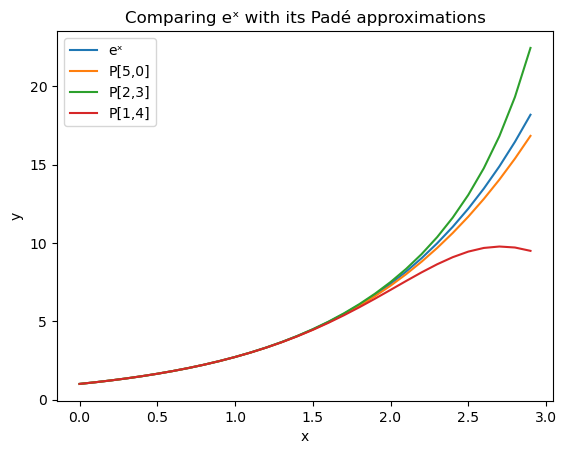

In [242]:
plt.close()
x=0.0001:0.1:3
plt.plot(x,exp.(x))
plt.plot(x,P₅₀.(x))
plt.plot(x,P₂₃.(x))
plt.plot(x,P₁₄.(x))
plt.legend(["eˣ","P[5,0]","P[2,3]","P[1,4]"])
plt.xlabel("x")
plt.ylabel("y")
plt.title("Comparing eˣ with its Padé approximations")
gcf()

This graph shows how all Palé approximations are accurate till around $x=2$, above which they start to diverge. P[1,4] starts curving downwards and is no longer a good approximation for $e^x$

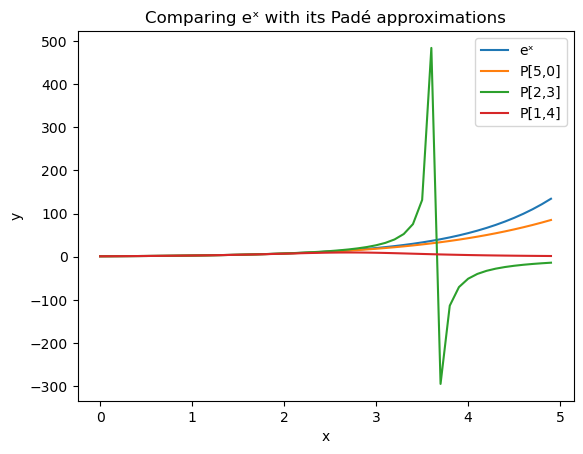

In [241]:
plt.close()
x=0.0001:0.1:5
plt.plot(x,exp.(x))
plt.plot(x,P₅₀.(x))
plt.plot(x,P₂₃.(x))
plt.plot(x,P₁₄.(x))
plt.legend(["eˣ","P[5,0]","P[2,3]","P[1,4]"])
plt.xlabel("x")
plt.ylabel("y")
plt.title("Comparing eˣ with its Padé approximations")
gcf()

Looking further, above x~2.5, P[2,3] also diverges significantly

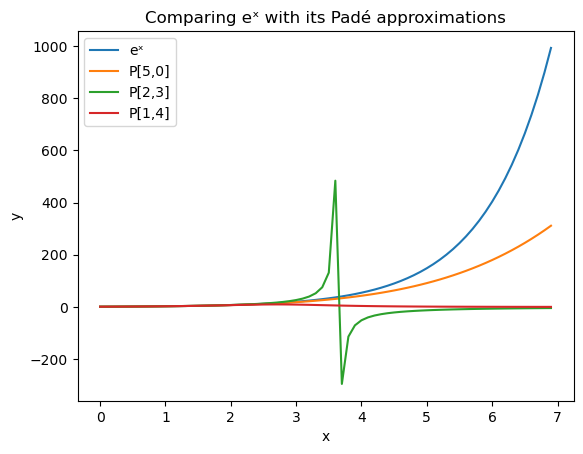

In [243]:
plt.close()
x=0.0001:0.1:7
plt.plot(x,exp.(x))
plt.plot(x,P₅₀.(x))
plt.plot(x,P₂₃.(x))
plt.plot(x,P₁₄.(x))
plt.legend(["eˣ","P[5,0]","P[2,3]","P[1,4]"])
plt.xlabel("x")
plt.ylabel("y")
plt.title("Comparing eˣ with its Padé approximations")
gcf()

Above x~4, none of these approximations will give good values for $e^x$